## Vampire test

In [ ]:
PrPV <- 0.95  # Likelihood
PrPM <- 0.01
PrV <- 0.001  # Prior
PrP <- PrPV*PrV + PrPM*(1-PrV)  # Avg. Likelihood
## Calculate PrVP
PrVP = (PrPV*PrV)/PrP
PrVP

## Globe tossing

ERROR: Error in library(rethinking): there is no package called ‘rethinking’


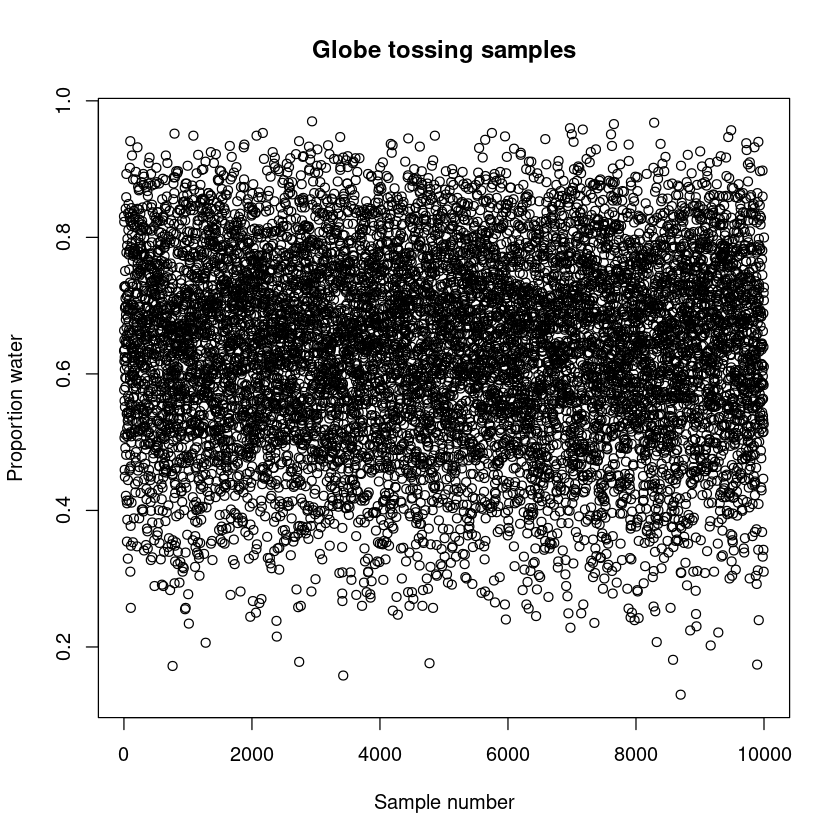

In [13]:
p_grid <- seq(from=0, to=1, length.out=1000)
prior <- rep(1, 1000)
likelihood <- dbinom(6, size=9, prob=p_grid)
posterior <- likelihood*prior
posterior <- posterior/sum(posterior)
## randomly grab samples from the posterior
samples <- sample(p_grid, prob=posterior, size=1e4, replace=TRUE)
plot(samples, main="Globe tossing samples",
              xlab="Sample number",
              ylab="Proportion water")
## Plot distribution of water proportion
library(rethinking)
dens(samples)

In [ ]:
# Prior to the tutorial make sure that the script below runs without error on your R installation.
# What you need is a working installation of Stan: http://mc-stan.org/ .
# For installation instructions, see here: 
# https://github.com/stan-dev/rstan/wiki/RStan-Getting-Started

# After installation you should be able to run this script which should output
# some summary statistics and some pretty plots, :)

# Generating some fake data
set.seed(123)
y <- rbinom(30, size = 1, prob = 0.2016)

# Fitting a simple binomial model using Stan
library(rstan)

model_string <- "
data {
  int n;
  int y[n];
}
parameters {
  real<lower=0, upper=1> theta;
}
model {
  y ~ bernoulli(theta);
}"

stan_samples <- stan(model_code = model_string, data = list(y = y, n = length(y)) )
stan_samples
traceplot(stan_samples)
plot(stan_samples)